### Test of dual_annealing  

#### Import libraries  

In [130]:
import numpy as np
import pandas as pd
from random import uniform
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt
import networkx as nx

In [131]:
csv_in = 'social_network.csv'
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=None)
print(df.shape)
print(df.info())
display(df.head())

(11, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11 non-null     object
 1   1       11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes
None


,0,1
0,Augustus,Willy
1,Mike,Joe
2,Miranda,Mike
3,Violet,Augustus
4,Miranda,Willy


#### Cost function 

In [132]:
G = nx.Graph()
for i, j in zip(df[0], df[1]):
    G.add_edges_from([(i,j)])

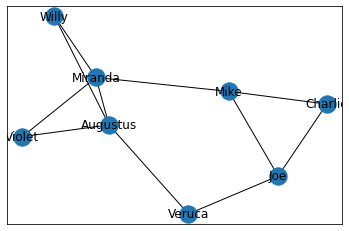

In [133]:
nx.draw_networkx(G)

#### Multiple trial and check obtained minima  

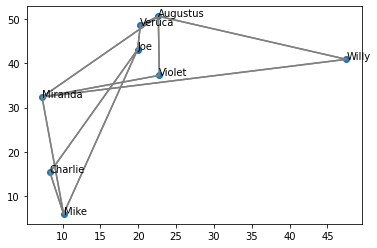

In [134]:
l = list( set( list(df[0]) + list(df[1]) ))
d = {}
for i, j in zip(df[0], df[1]):
    d[(i,j)] = True
    d[(j,i)] = True
points = [np.zeros(2) for x in range(len(l))]
xs = []
ys = []
dx = {}
dy = {}
for i in range(len(l)):
    points[i][0] = uniform(0, 51.0)
    points[i][1] = uniform(0, 51.0)
    xs.append(points[i][0])
    ys.append(points[i][1])
    dx[l[i]] = xs[i]
    dy[l[i]] = ys[i]
plt.scatter(xs, ys)
for i in l:
    plt.annotate(i, (dx[i], dy[i]))
    for j in l:
        if (i,j) in d.keys():
            plt.plot([dx[i],dx[j]], [dy[i],dy[j]], color='gray')

In [135]:
def intersect(p1, p2, p3, p4):
    def ccw(p1,p2,p3): #counter clockwise of 3 points
        return (p3[1]-p1[1])*(p2[0]-p1[0]) > (p2[1]-p1[1])*(p3[0]-p1[0])
    return ccw(p1,p3,p3) != ccw(p2,p3,p3) and ccw(p1,p2,p3) != ccw(p1,p2,p3)

def f(x):
    cost = 0
    def dist(p1, p2):
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
    for i in range(len(l)):
        for j in range(i,len(l)):
            if (l[i],l[j]) in d.keys():
                cost += (dist(x[i], x[j]) - 15)**2
            else:
                cost += (dist(x[i], x[j]) - 30)**2
            for k in range(j,len(l)):
                for z in range(k,len(l)):
                    if intersect(x[i],x[j],x[k],x[z]):
                        cost += 50
    return cost

In [138]:
bounds = [(0, 51.0) for i in range(len(l))]
bounds

[(0, 51.0),
 (0, 51.0),
 (0, 51.0),
 (0, 51.0),
 (0, 51.0),
 (0, 51.0),
 (0, 51.0),
 (0, 51.0)]

In [142]:
n_trial = 3
for i in range(n_trial):
    points = [[0, 0] for x in range(len(l))]
    xs = []
    ys = []
    dx = {}
    dy = {}
    for i in range(len(l)):
        points[i][0] = uniform(0, 51.0)
        points[i][1] = uniform(0, 51.0)
        xs.append(points[i][0])
        ys.append(points[i][1])
        dx[l[i]] = xs[i]
        dy[l[i]] = ys[i]
    # plt.scatter(xs, ys)
    # for i in l:
    #     plt.annotate(i, (dx[i], dy[i]))
    #     for j in l:
    #         if (i,j) in d.keys():
    #             plt.plot([dx[i],dx[j]], [dy[i],dy[j]], color='gray')
    
    # Dual annealing optimization
    ret = dual_annealing(f, bounds, args=points, maxiter=500, seed=19)
    print('x:', ret.x)
    print('f(x):', ret.fun)

[[6.566722117566671, 40.54082934527085], [13.992701400916658, 38.28078598496664], [23.99334248275776, 14.445476073646411], [37.14140031165354, 27.64026880674497], [0.2615217047409121, 5.25045878974767], [29.915956763532364, 13.680641464122886], [22.21861752510566, 39.86970550030965], [48.61354877401618, 50.641031407805684]]


TypeError: f() takes 1 positional argument but 9 were given